# Creating a wildtype (WT / PD0), and Parkinson degeneration (PD2) network

In the directory ```network_path``` we have three sub directories ```PD0```, ```PD2-ref``` and ```PD2```. In order to generate the ```PD2``` network, we degenerate the ```PD0``` network by swapping the WT morphologies for the PD2 morphologies. In addition a subset of the synapses in the ```PD2-ref``` network are added to compensate for differences in pruning.

We need to specify a ```connection_override``` file. The difference compared to the standard connection file is that it contains ```recovery``` information, i.e. the fraction of synapses from the ```PD2-ref``` network that should be added to the ```PD2``` network.

The ```rc``` object is a ```ipyparallel``` ```RemoteClient``` object for parallel execution.

If you want to remap external input that was removed to a new position, then use ```remap_removed_input = True```

In [1]:
import os

network_path = os.path.join("networks","PD-example-2k")
#network_path = os.path.join("networks","PD-example-2_ref_0.9")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 2000
input_config = "test-input.json"  # Only background input will be used in this example

snudda_data_base_path = os.path.join("..", "..", "..", "..", "BasalGangliaData", "Parkinson", "20221213")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")

input_pd0 = os.path.join(network_path_pd0, "input-spikes.hdf5")
input_pd2 = os.path.join(network_path_pd2, "input-spikes.hdf5")

# Do we want to remap removed input?
remap_removed_input = False
remapped_fraction = 0.0

# Do we want to remap removed input?
#remap_removed_input = True
#remapped_fraction = 0.9

rc = None

## First generate the WT reference network

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd0, random_seed=123456, snudda_data=snudda_data_pd0,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd0)

Adding Striatum with 2000 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/2/parameters.json
Mechanism f

In [3]:
from snudda import Snudda
snd_pd0 = Snudda(network_path=network_path_pd0)
snd_pd0.create_network()

Placing neurons
Network path: networks/PD-example-2k/PD0
Creating missing directory networks/PD-example-2k/PD0/log
Created directory networks/PD-example-2k/PD0/log
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2k/PD0/network-config.json
Generating 8048 points for networks/PD-example-2k/PD0/mesh/Striatum-cube-mesh-0.00029179512939439816.obj
n_points = 7663, previous close_pairs = 13116
n_points = 7299, previous close_pairs = 10642
n_points = 6955, previous close_pairs = 8774
n_points = 6632, previous close_pairs = 7295
n_points = 6328, previous close_pairs = 6085
n_points = 6045, previous close_pairs = 5078
n_points = 5782, previous close_pairs = 4273
n_points = 5541, previous close_pairs = 3550
n_points = 5321, previous close_pairs = 2959
n_points = 5121, previous close_pairs = 2534
n_points = 4940, previous close_pairs = 2165
n_points = 4779, previous close_pairs = 1821
n_points = 4636, previous close_pairs = 1523
n_points = 4595, pre

In [4]:
snd_pd0.setup_input(input_config=input_config)

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2k/PD0/network-config.json
Writing input spikes to networks/PD-example-2k/PD0/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2k/PD0/network-config.json
Writing spikes to networks/PD-example-2k/PD0/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 376.5s


## Generate a PD2 reference network

This network will not have the same synapses as the WT, but it is used in order to add "recovery synapses" to compensate for part of the degeneration.

In [5]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd2_ref, random_seed=123456, snudda_data=snudda_data_pd2,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd2)

Adding Striatum with 2000 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/parameters.json
Mechanism f

In [6]:
from snudda import Snudda
snd_pd2_ref = Snudda(network_path=network_path_pd2_ref)
snd_pd2_ref.create_network()

Placing neurons
Network path: networks/PD-example-2k/PD2-ref
Creating missing directory networks/PD-example-2k/PD2-ref/log
Created directory networks/PD-example-2k/PD2-ref/log
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2k/PD2-ref/network-config.json
Generating 8048 points for networks/PD-example-2k/PD2-ref/mesh/Striatum-cube-mesh-0.00029179512939439816.obj
n_points = 7663, previous close_pairs = 13116
n_points = 7299, previous close_pairs = 10642
n_points = 6955, previous close_pairs = 8774
n_points = 6632, previous close_pairs = 7295
n_points = 6328, previous close_pairs = 6085
n_points = 6045, previous close_pairs = 5078
n_points = 5782, previous close_pairs = 4273
n_points = 5541, previous close_pairs = 3550
n_points = 5321, previous close_pairs = 2959
n_points = 5121, previous close_pairs = 2534
n_points = 4940, previous close_pairs = 2165
n_points = 4779, previous close_pairs = 1821
n_points = 4636, previous close_pairs = 1523


In [7]:
snd_pd2_ref.setup_input(input_config=input_config)

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2k/PD2-ref/network-config.json
Writing input spikes to networks/PD-example-2k/PD2-ref/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2k/PD2-ref/network-config.json
Writing spikes to networks/PD-example-2k/PD2-ref/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 280.5s


## Degenerating the PD0 network to get PD2 network

In [8]:
network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")

from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                             updated_network_file=network_file_pd2_ref,
                                             output_network_file=network_file_pd2,
                                             original_snudda_data_dir=snudda_data_pd0,
                                             updated_snudda_data_dir=snudda_data_pd2,
                                             original_input_file=input_pd0,
                                             output_input_file=input_pd2)
swap.write_new_network_file()
swap.write_new_input_file(remap_removed_input=remap_removed_input, remapped_fraction=remapped_fraction)
swap.close()

Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/lts/6/lts_morp_9862_centered_no_axon_resampled-var6.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/optim_chin_morph_renamed2019-11-08.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/lts/2/lts_morp_9862_centered_no_axon_resampled-var2.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-

## Plotting of a degenerated neuron

In [9]:
# This is so we get the most central dSPN in the network
from snudda import SnuddaLoad
sl = SnuddaLoad(network_path_pd0)
neuron_id = list(sl.get_centre_neurons_iterator(neuron_type="dSPN", n_neurons=1))[0][0]

In [10]:
# neuron_id = 55
neuron_id

554

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2k/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2k/PD0/network-config.json
Plotting 200 external synapses
Plotting 200 external synapses


/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:118: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=coords[:, 0], ys=coords[:, 1], zs=coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:125: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=syn_coords[:, 0], ys=syn_coords[:, 1], zs=syn_coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.p

Figure written: networks/PD-example-2k/PD0/figures/input-to-554-dSPN_32-and-internal-synapses.png


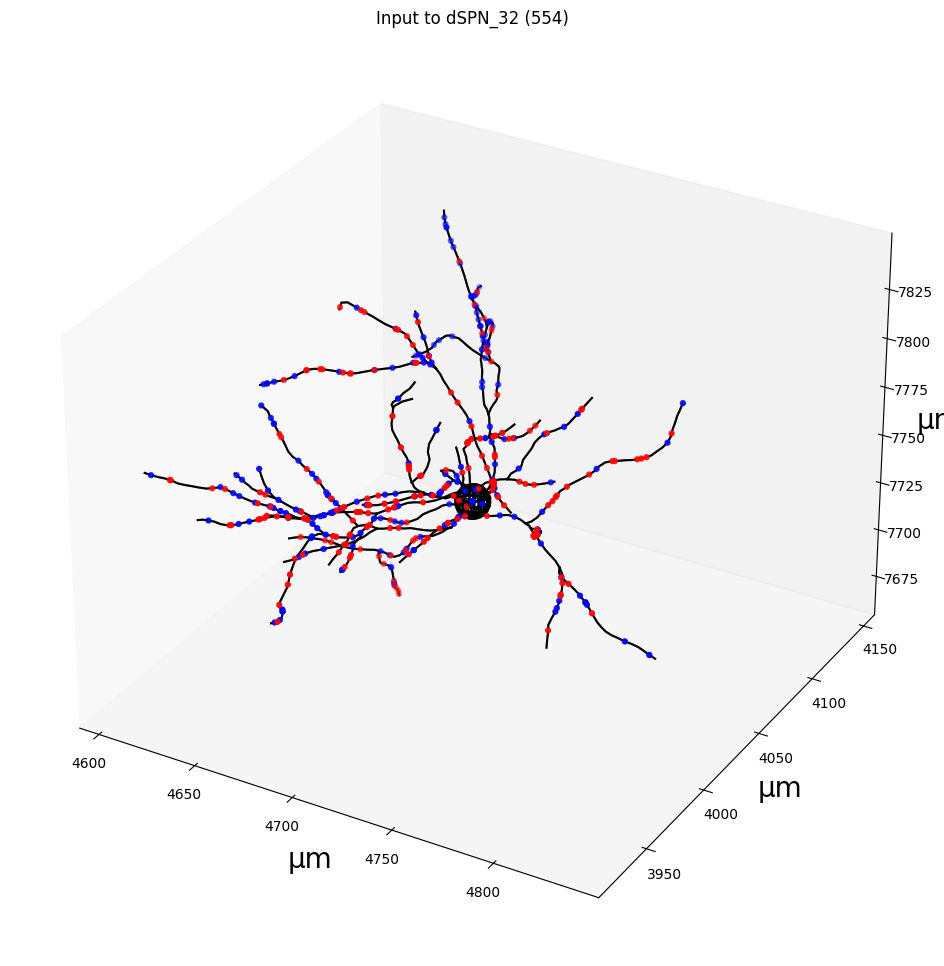

In [11]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

# Note here original and degenerate path were the same, so we are plotting the full neuron and its synapses.
pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd0)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)
#internal synapses are blue
#external synapses are red

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2k/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2k/PD2/network-synapses.hdf5
Plotting 200 external synapses
Plotting 55 external synapses
Figure written: networks/PD-example-2k/PD2/figures/input-to-554-dSPN_32-and-internal-synapses.png


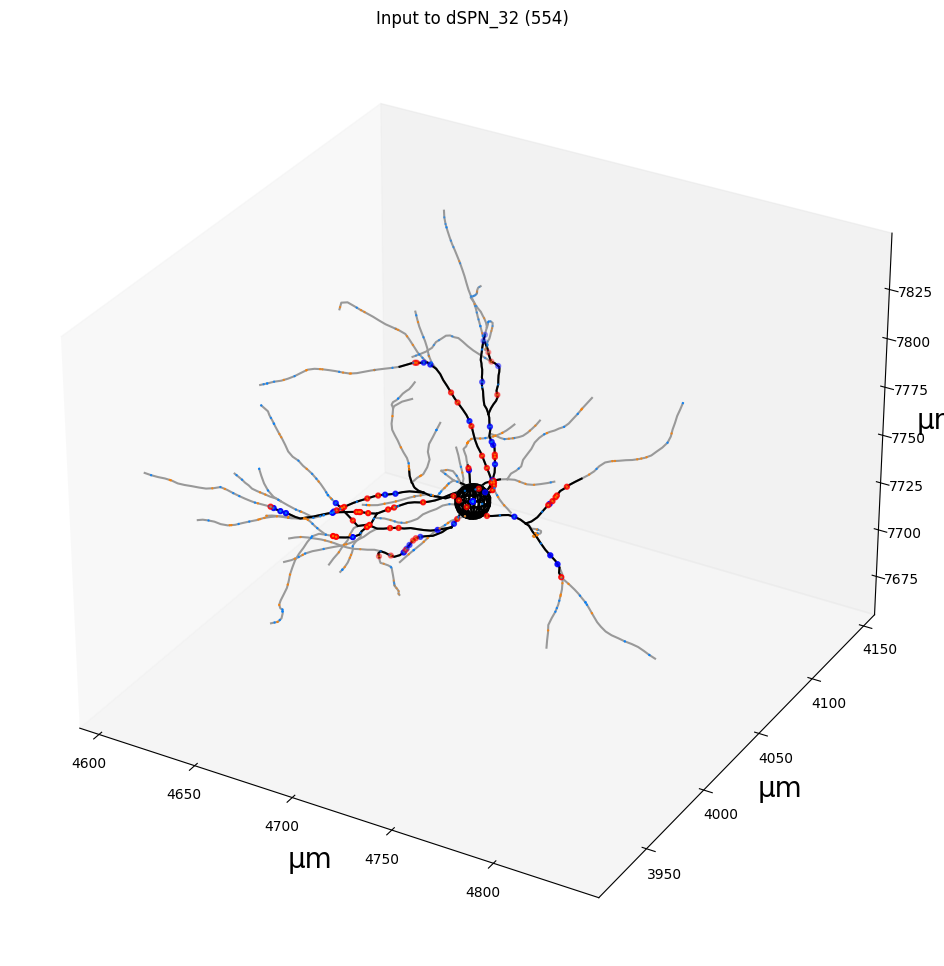

In [12]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2k/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2k/PD2-ref/network-config.json
Plotting 200 external synapses
Plotting 200 external synapses
Figure written: networks/PD-example-2k/PD2-ref/figures/input-to-554-dSPN_32-and-internal-synapses.png


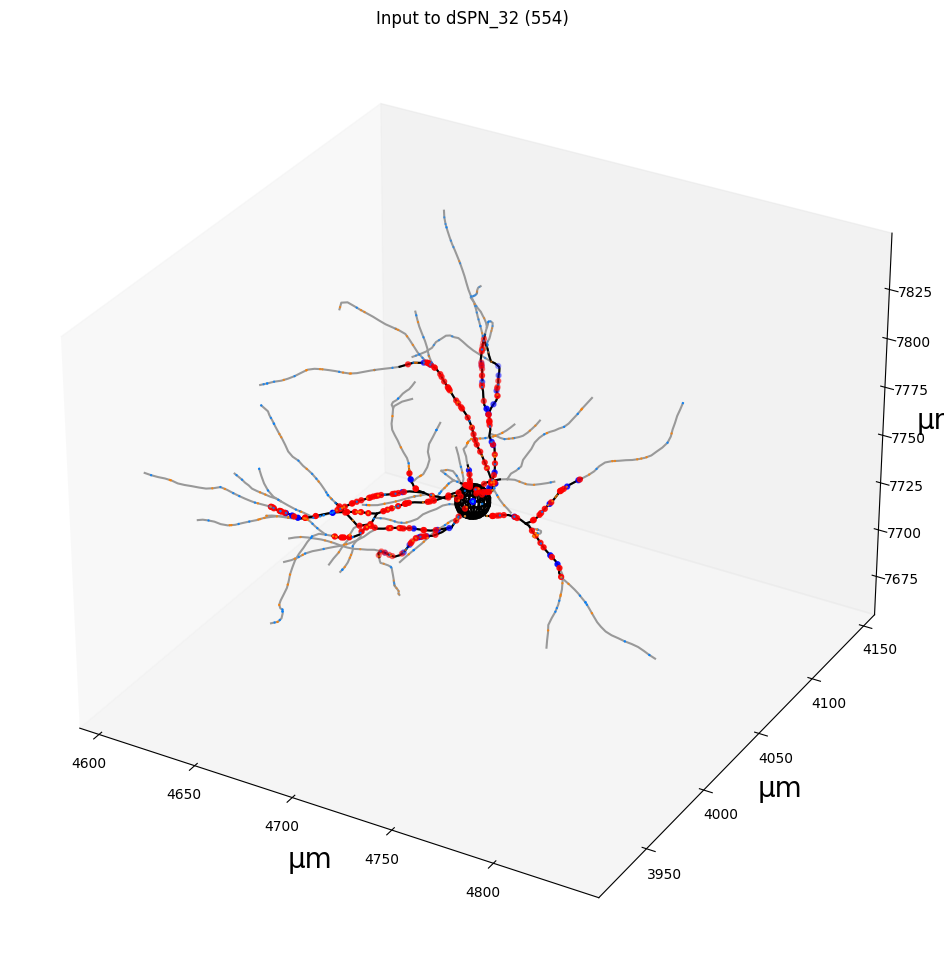

In [13]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2_ref)
#neuron_id = 55
pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

In [14]:
from snudda.analyse.analyse_input import AnalyseInput

pd0_input_info = AnalyseInput(input_file=input_pd0, network_path=network_path_pd0)
pd2_input_info = AnalyseInput(input_file=input_pd2, network_path=network_path_pd2)

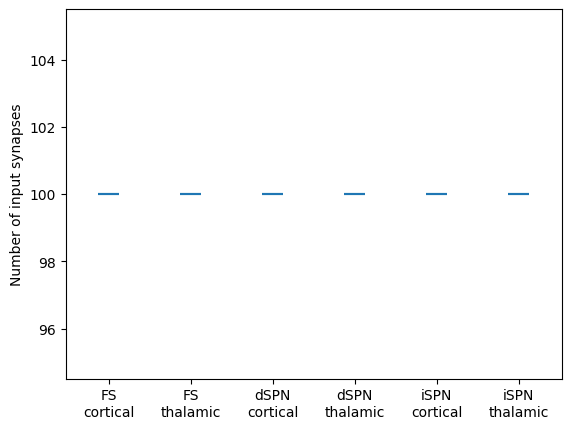

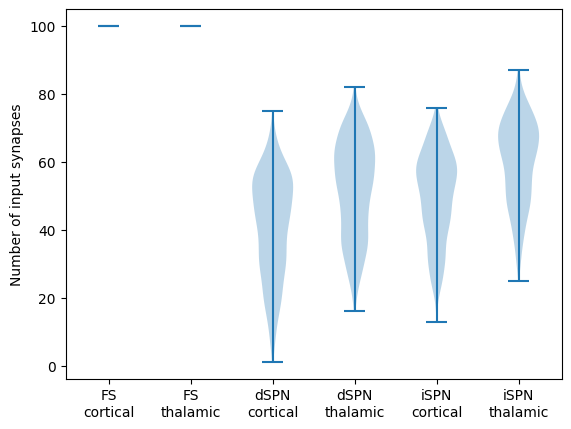

In [15]:
pd0_input_info.plot_input_count("PD0-input_example.png")
pd2_input_info.plot_input_count("PD2-input_example.png")

In [16]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2k/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 1996 neurons with 728787 synapses and 217 gap junctions
Load done. 0.2
ChIN -> LTS: 208 synapses
ChIN -> dSPN: 5423 synapses
ChIN -> iSPN: 5508 synapses
FS -> FS: 320 synapses
FS -> LTS: 46 synapses
FS -> dSPN: 28082 synapses
FS -> iSPN: 17139 synapses
LTS -> ChIN: 416 synapses
LTS -> dSPN: 1348 synapses
LTS -> iSPN: 989 synapses
dSPN -> ChIN: 203 synapses
dSPN -> dSPN: 145858 synapses
dSPN -> iSPN: 36654 synapses
iSPN -> ChIN: 185 synapses
iSPN -> dSPN: 160711 synapses
iSPN -> iSPN: 325697 synapses

PD2
Loading networks/PD-example-2k/PD2/network-synapses.hdf5
Loading config data from HDF5
Loading 1996 neurons with 312811 synapses and 217 gap junctions
Load done. 0.1
ChIN -> LTS: 215 synapses
ChIN -> dSPN: 1449 synapses
ChIN -> iSPN: 1932 synapses
FS -> FS: 577 synapses
FS -> LTS: 73 synapses
FS -> dSPN: 27624 synapses
FS -> iSPN: 42572 synapses
LTS -> ChIN: 418 synapses
LTS -> dSPN: 393 s

0

In [17]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --listPre {neuron_id}"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2k/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 1996 neurons with 728787 synapses and 217 gap junctions
Load done. 0.1
List neurons pre-synaptic to neuron_id = 554 (dSPN_32)
The neuron receives 219 synapses
84 : iSPN_13 (2 synapses)
120 : dSPN_10 (2 synapses)
123 : dSPN_23 (2 synapses)
131 : iSPN_33 (2 synapses)
145 : FS_2 (12 synapses)
202 : dSPN_6 (3 synapses)
257 : dSPN_16 (3 synapses)
267 : iSPN_15 (4 synapses)
271 : iSPN_26 (2 synapses)
280 : dSPN_34 (3 synapses)
297 : dSPN_21 (3 synapses)
308 : iSPN_17 (3 synapses)
312 : iSPN_34 (3 synapses)
323 : iSPN_1 (3 synapses)
342 : dSPN_30 (3 synapses)
354 : dSPN_6 (1 synapses)
378 : dSPN_10 (3 synapses)
517 : iSPN_14 (3 synapses)
522 : ChIN_0 (16 synapses)
536 : dSPN_29 (3 synapses)
549 : dSPN_17 (3 synapses)
562 : iSPN_27 (2 synapses)
582 : dSPN_14 (3 synapses)
596 : dSPN_0 (3 synapses)
615 : iSPN_32 (3 synapses)
621 : dSPN_29 (4 synapses)
662 : iSPN_16 (2 synapses)
671 : iSPN_33 (2 syna

0

Added: 10, removed: 166, kept: 29


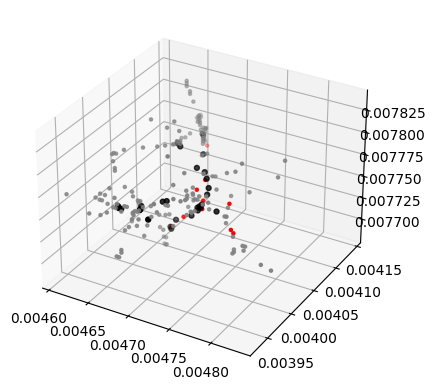

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [18]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

Added: 36, removed: 184, kept: 11


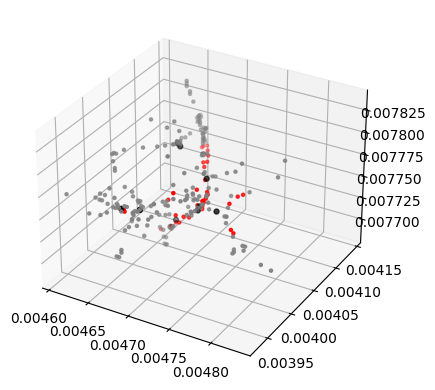

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [19]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2_ref, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

In [20]:
from snudda.analyse.analyse import SnuddaAnalyse


network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")

dist3D = False
y_max_H = None

sa_pd0 = SnuddaAnalyse(network_file_pd0)
sa_pd2 = SnuddaAnalyse(network_file_pd2)
sa_pd2_ref = SnuddaAnalyse(network_file_pd2_ref)    

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 1996
Synapse row 0 - 0.0 % time: 0.04120318100467557 seconds
Created connection matrix 0.7211444860004121 seconds
GJ row : 0 - 0.0 %  time : 0.0012692929958575405 seconds
Created gap junction connection matrix 0.0017515860017738305 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 1996/1996
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 728787, at 0
Created distance histogram (optimised) in 0.716768771999341 seconds
Saving cache to networks/PD-example-2k/PD0/network-synapses.hdf5-cache
Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 1996
Synapse row 0 - 0.0 % time: 0.028523747001599986 seconds
Created connection matrix 0.3072935870004585 seconds
GJ row : 0 - 0.0 %  time : 0.0008943760039983317 seconds
Created gap junction connection matrix 0.0013405850040726364 sec

Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 967/967
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [935089.]
P(d<5e-05) = 0.056121468383624834
P(d<0.0001) = 0.042331173685522056
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [935089.]


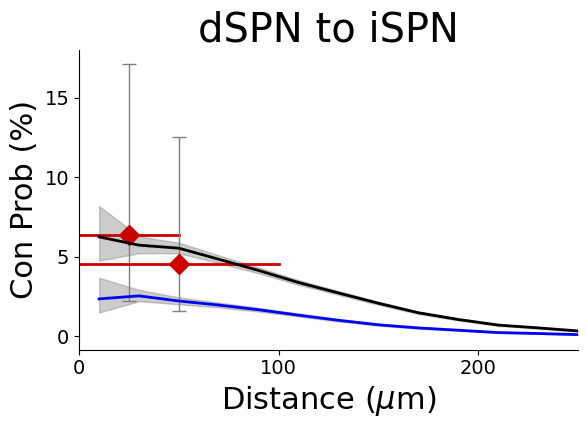

Wrote networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png


({},
 'networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png')

In [21]:
ax = sa_pd0.plot_connection_probability("dSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(3, 47), (3, 66)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("dSPN", "iSPN", dist_3d=True, ax=ax, colour="blue")

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 14243 connections


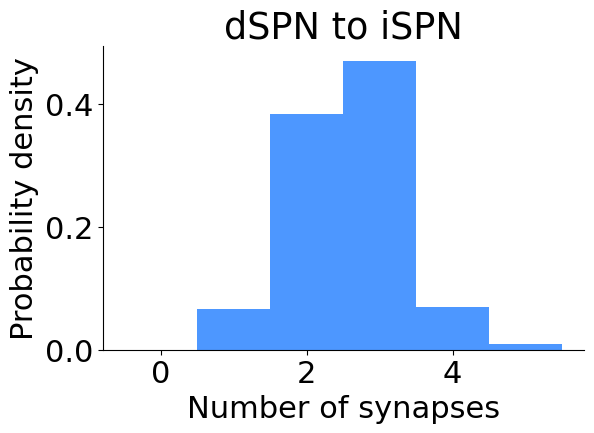

Wrote networks/PD-example-2k/PD0/figures/Network-number-of-synapses-from-dSPN-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 5297 connections


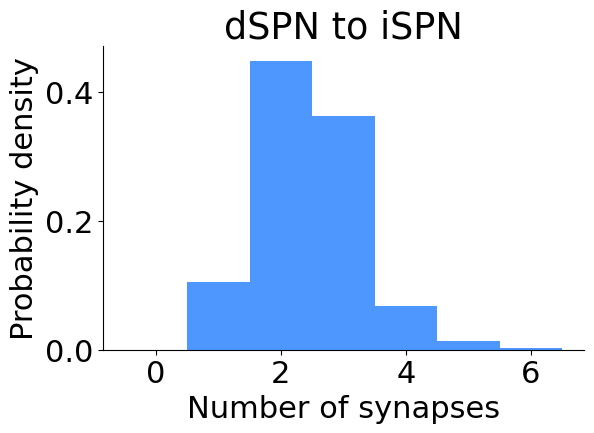

Wrote networks/PD-example-2k/PD2/figures/Network-number-of-synapses-from-dSPN-to-iSPN-per-cell.png


In [22]:
sa_pd0.plot_num_synapses_per_pair("dSPN", "iSPN")
sa_pd2.plot_num_synapses_per_pair("dSPN", "iSPN")

Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [934122.]
P(d<5e-05) = 0.2364952380952381
P(d<0.0001) = 0.16334797280531985
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [934122.]
P(d<5e-05) = 0.084


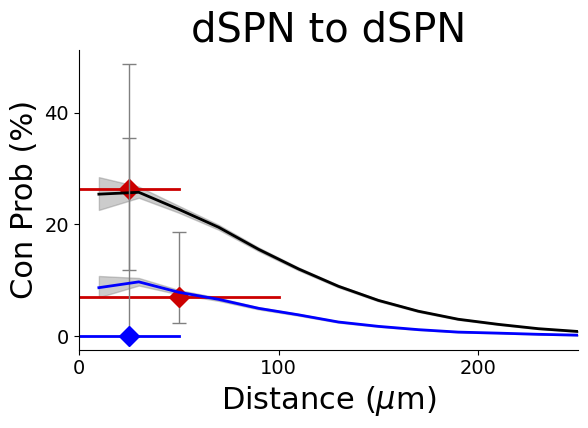

Wrote networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 48924 connections


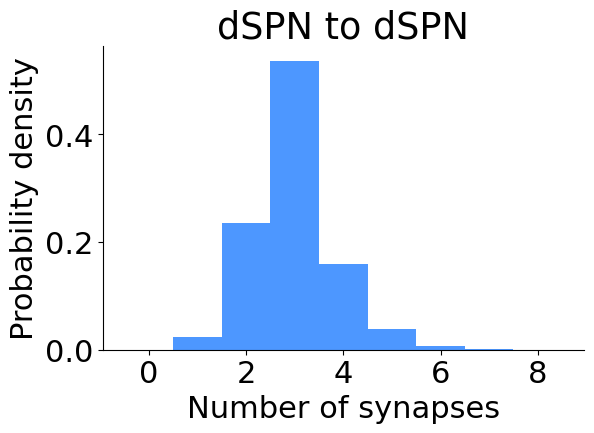

Wrote networks/PD-example-2k/PD0/figures/Network-number-of-synapses-from-dSPN-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 14653 connections


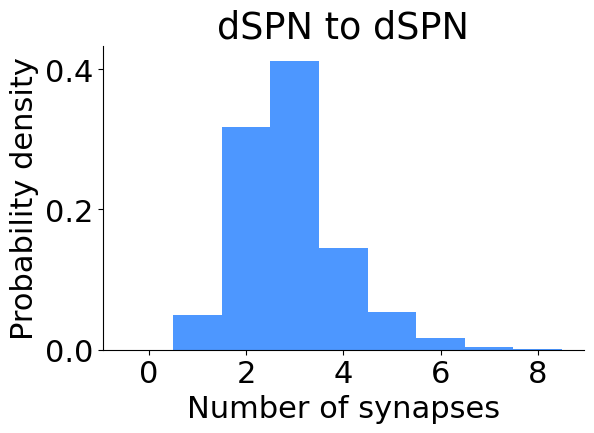

Wrote networks/PD-example-2k/PD2/figures/Network-number-of-synapses-from-dSPN-to-dSPN-per-cell.png


In [23]:
ax = sa_pd0.plot_connection_probability("dSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(5, 19), (3, 43)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("dSPN", "dSPN", dist_3d=True, ax=ax, colour="blue", exp_colour="blue", exp_data_detailed=[(0, 7)], exp_max_dist=[50e-6])

sa_pd0.plot_num_synapses_per_pair("dSPN", "dSPN")
sa_pd2.plot_num_synapses_per_pair("dSPN", "dSPN")

Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [934122.]
P(d<5e-05) = 0.3434792435771868
P(d<0.0001) = 0.26684483317136376
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [934122.]
P(d<5e-05) = 0.1717019513297672


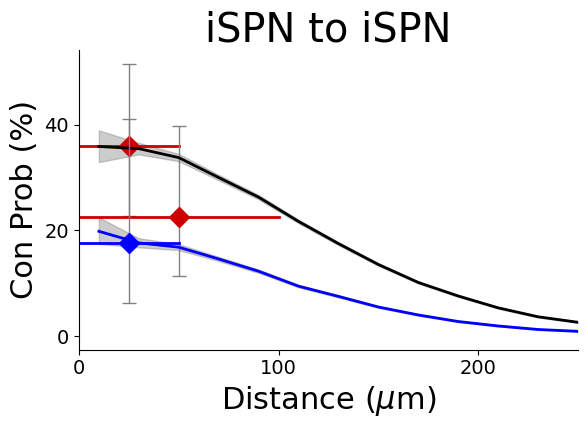

Wrote networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 94138 connections


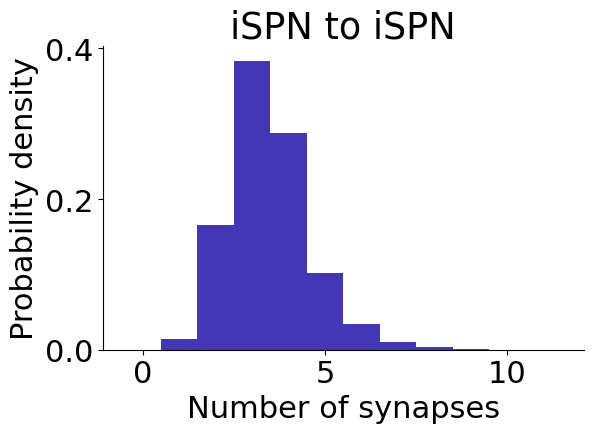

Wrote networks/PD-example-2k/PD0/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 40099 connections


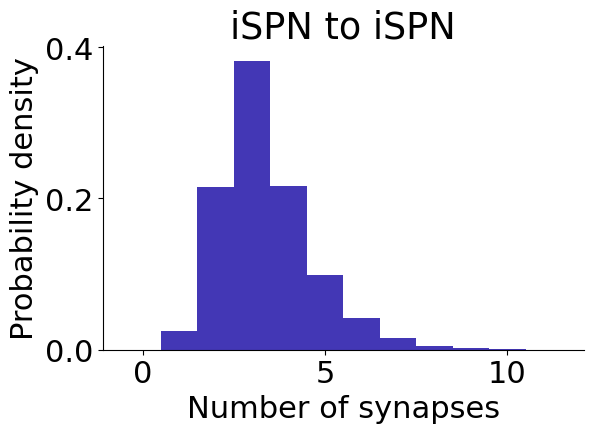

Wrote networks/PD-example-2k/PD2/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.png


In [24]:
ax = sa_pd0.plot_connection_probability("iSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(14, 39), (7, 31)], return_ax=True, show_plot=False, save_figure=False)
# PD connectivity from Taverna et al 2008
sa_pd2.plot_connection_probability("iSPN", "iSPN", dist_3d=True, ax=ax, colour="blue", exp_colour="blue", exp_data_detailed=[(3,17)], exp_max_dist=[50e-6])

sa_pd0.plot_num_synapses_per_pair("iSPN", "iSPN")
sa_pd2.plot_num_synapses_per_pair("iSPN", "iSPN")

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [935089.]
P(d<5e-05) = 0.2578896790313281
P(d<0.0001) = 0.17519312235235485
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [935089.]
P(d<5e-05) = 0.09890447818566211


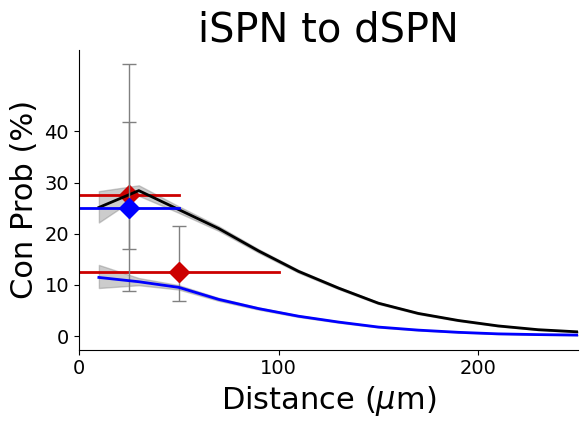

Wrote networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 50814 connections


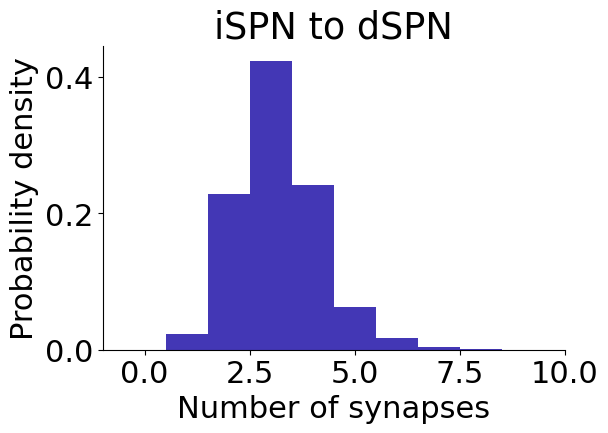

Wrote networks/PD-example-2k/PD0/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 15514 connections


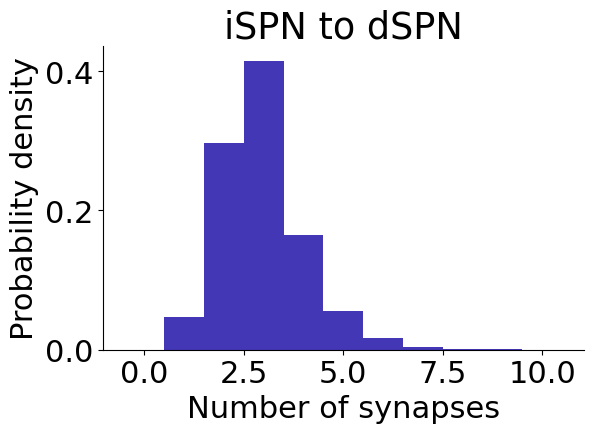

Wrote networks/PD-example-2k/PD2/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png


In [25]:
ax = sa_pd0.plot_connection_probability("iSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(13, 47), (10, 80)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("iSPN", "dSPN", dist_3d=True, ax=ax, colour="blue", exp_colour="blue", exp_max_dist=[50e-6], exp_data_detailed=[(3, 12)])

sa_pd0.plot_num_synapses_per_pair("iSPN", "dSPN")
sa_pd2.plot_num_synapses_per_pair("iSPN", "dSPN")

Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 26/26
Counting connections
Requested: 10000000.0 calculated [650.]
P(d<0.00025) = 0.18482490272373542
Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 26/26
Counting connections
Requested: 10000000.0 calculated [650.]


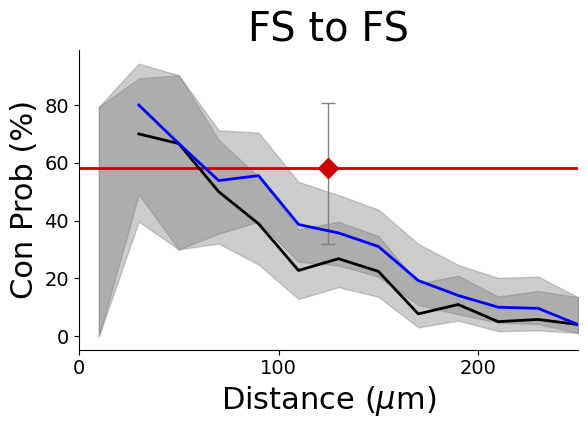

Wrote networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 26/26
Calculating max synapses
Calculating mean synapses
Plotting 95 connections


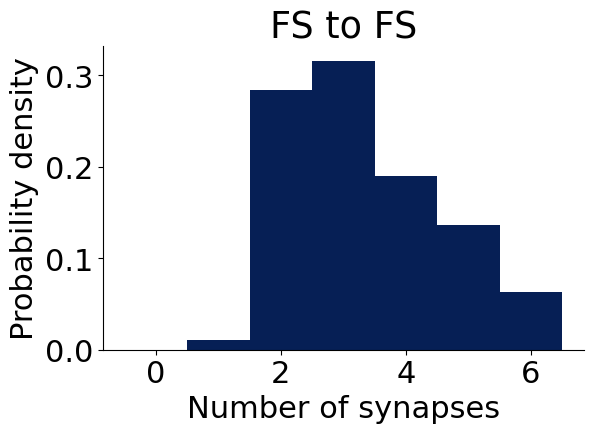

Wrote networks/PD-example-2k/PD0/figures/Network-number-of-synapses-from-FS-to-FS-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 26/26
Calculating max synapses
Calculating mean synapses
Plotting 134 connections


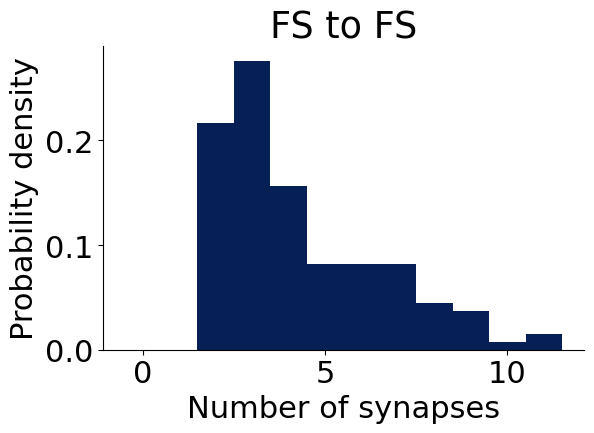

Wrote networks/PD-example-2k/PD2/figures/Network-number-of-synapses-from-FS-to-FS-per-cell.png


In [26]:
ax = sa_pd0.plot_connection_probability("FS", "FS", dist_3d=True, exp_max_dist=[250e-6], exp_data_detailed=[(7, 12)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "FS", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "FS")
sa_pd2.plot_num_synapses_per_pair("FS", "FS")

Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [25142.]
P(d<0.0001) = 0.49450811843361986
P(d<0.00015) = 0.3806138168029387
P(d<0.00025) = 0.2078367907410132
Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [25142.]


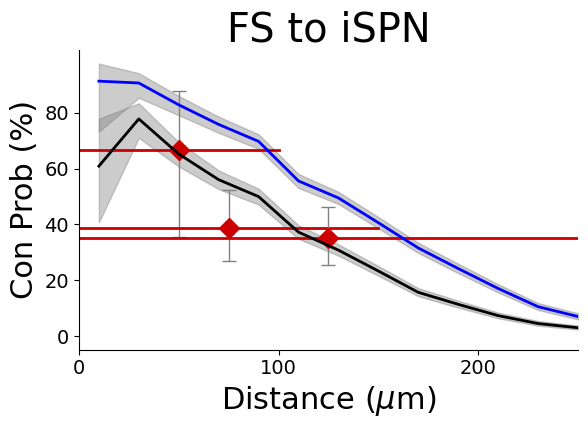

Wrote networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-FS-to-iSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 4306 connections


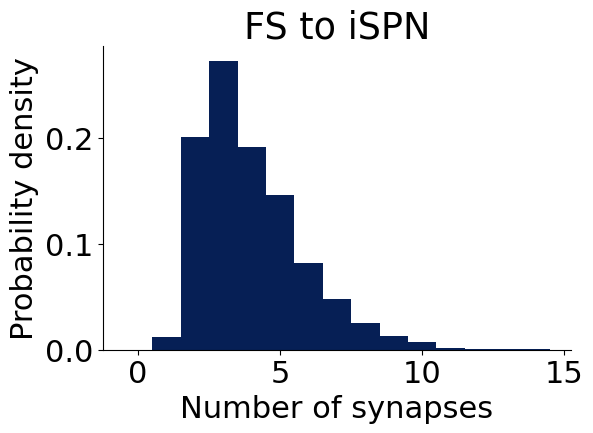

Wrote networks/PD-example-2k/PD0/figures/Network-number-of-synapses-from-FS-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 7151 connections


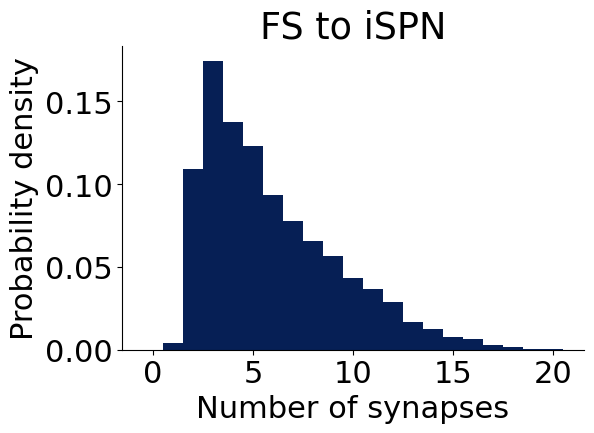

Wrote networks/PD-example-2k/PD2/figures/Network-number-of-synapses-from-FS-to-iSPN-per-cell.png


In [27]:
ax = sa_pd0.plot_connection_probability("FS", "iSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(6, 9), (21, 54), (27,77)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "iSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "iSPN")
sa_pd2.plot_num_synapses_per_pair("FS", "iSPN")

Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [25142.]
P(d<0.0001) = 0.6711533998607565
P(d<0.00015) = 0.5335426113242646
P(d<0.00025) = 0.3049690660905431
Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 967/967
Counting connections
Requested: 10000000.0 calculated [25142.]


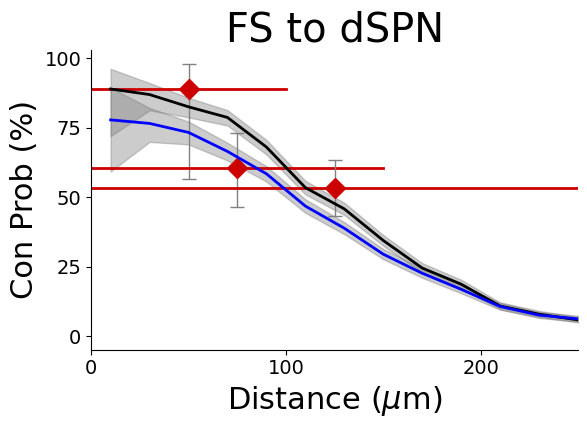

Wrote networks/PD-example-2k/PD2/figures/Network-distance-dependent-connection-probability-FS-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 6332 connections


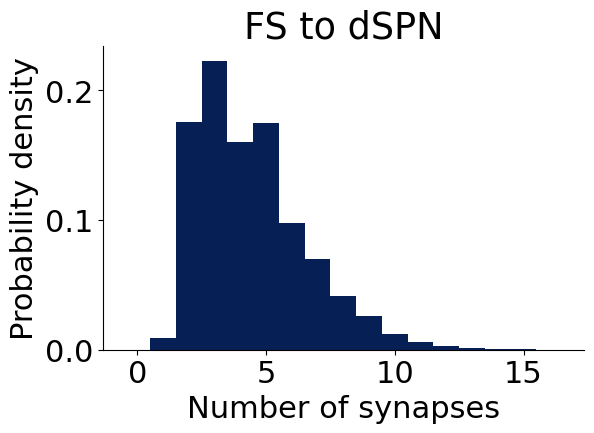

Wrote networks/PD-example-2k/PD0/figures/Network-number-of-synapses-from-FS-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 967/967
Calculating max synapses
Calculating mean synapses
Plotting 5580 connections


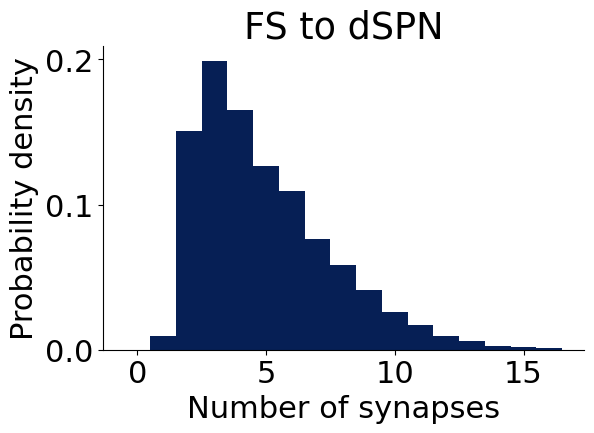

Wrote networks/PD-example-2k/PD2/figures/Network-number-of-synapses-from-FS-to-dSPN-per-cell.png


In [28]:
ax = sa_pd0.plot_connection_probability("FS", "dSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(8, 9), (29, 48), (48,90)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "dSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "dSPN")
sa_pd2.plot_num_synapses_per_pair("FS", "dSPN")